In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [2]:
sns.set()
sns.set_palette(palette='deep')
import folium                 # for Displaying map of Berlin City
from folium.plugins import FastMarkerCluster

In [3]:
listings= pd.read_csv('listings_summary.csv')
listings.head()

,id,scrape_id,last_scraped,experiences_offered,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,...,review_scores_value,requires_license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,2.018110e+13,43411,none,2217,Ian,18-08-2008,"Key Biscayne, Florida, United States",within an hour,0.96,...,9.0,t,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,2.018110e+13,43411,none,2986,Michael,16-09-2008,"Berlin, Berlin, Germany",NaN,NaN,...,10.0,t,NaN,f,f,flexible,f,f,1,1.42
2,3176,2.018110e+13,43411,none,3718,Britta,19-10-2008,"Coledale, New South Wales, Australia",within a day,1.00,...,9.0,t,NaN,t,f,strict_14_with_grace_period,f,f,1,1.25
3,3309,2.018110e+13,43411,none,4108,Jana,07-11-2008,"Berlin, Berlin, Germany",NaN,NaN,...,9.0,t,NaN,f,f,strict_14_with_grace_period,f,f,1,0.39
4,7071,2.018110e+13,43411,none,17391,Bright,16-05-2009,"Berlin, Berlin, Germany",within an hour,1.00,...,9.0,t,NaN,f,f,moderate,f,f,1,1.75


In [4]:
pd.options.display.max_columns = None 
listings.head() 

,id,scrape_id,last_scraped,experiences_offered,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,2.018110e+13,43411,none,2217,Ian,18-08-2008,"Key Biscayne, Florida, United States",within an hour,0.96,NaN,t,Mitte,4.0,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Mitte,Brunnenstr. Süd,Mitte,Berlin,Berlin,10119,Berlin,"Berlin, Germany",DE,Germany,52.534537,13.402557,f,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,$60.00,NaN,NaN,$200.00,$30.00,1,$28.00,4,1125,3 months ago,t,0,21,51,141,43411,118,42471.0,43401.0,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,2.018110e+13,43411,none,2986,Michael,16-09-2008,"Berlin, Berlin, Germany",NaN,NaN,NaN,f,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",NaN,Prenzlauer Berg Nordwest,Pankow,Berlin,Berlin,10437,Berlin,"Berlin, Germany",DE,Germany,52.548513,13.404553,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",NaN,$17.00,NaN,NaN,$0.00,$0.00,1,$0.00,2,40,7 weeks ago,t,0,0,0,0,43411,6,43285.0,43374.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,f,f,flexible,f,f,1,1.42
2,3176,2.018110e+13,43411,none,3718,Britta,19-10-2008,"Coledale, New South Wales, Australia",within a day,1.00,NaN,f,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t,"Berlin, Berlin, Germany",Prenzlauer Berg,Prenzlauer Berg Südwest,Pankow,Berlin,Berlin,10405,Berlin,"Berlin, Germany",DE,Germany,52.534996,13.417579,t,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",720.0,$90.00,$520.00,"$1,900.00",$200.00,$50.00,2,$20.00,62,1125,a week ago,t,0,0,0,220,43411,143,39984.0,42814.0,92.0,9.0,9.0,9.0,9.0,10.0,9.0,t,NaN,t,f,strict_14_with_grace_period,f,f,1,1.25
3,3309,2.018110e+13,43411,none,4108,Jana,07-11-2008,"Berlin, Berlin, Germany",NaN,NaN,NaN,f,Schöneberg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",Schöneberg,Schöneberg-Nord,Tempelhof - Schöneberg,Berlin,Berlin,10777,Berlin,"Berlin, Germany",DE,Germany,52.498855,13.349065,t,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",0.0,$26.00,$175.00,$599.00,$250.00,$30.00,1,$18.00,5,360,4 weeks ago,t,0,0,22,297,43411,25,41498.0,43328.0,88.0,9.0,9.0,9.0,10.0,9.0,9.0,t,NaN,f,f,strict_14_with_grace_period,f,f,1,0.39
4,7071,2.018110e+13,43411,none,17391,Bright,16-05-2009,"Berlin, Berlin, Germany",within an hour,1.00,NaN,t,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",Prenzlauer Berg,Helmholtzplatz,Pankow,Berlin,Berlin,10437,Berlin,"Berlin, Germany",DE,Germany,52.543157,13.415091,t,Apartment,Private ro

In [5]:
listings.shape

(22552, 76)

In [6]:
listings["smart_location"].value_counts()

Berlin, Germany                                22419
., Germany                                        12
Berlin , Germany                                  12
Schöneberg, Germany                               11
Mitte, Germany                                     8
                                               ...  
Baseler Straße 91 A, 12205 Berlin , Germany        1
Wannsee, Germany                                   1
Berlin, Schöneberg, Germany                        1
Berlin-Wedding, Germany                            1
柏林, Germany                                        1
Name: smart_location, Length: 61, dtype: int64

In [7]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 76 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22552 non-null  int64  
 1   scrape_id                         22552 non-null  float64
 2   last_scraped                      22552 non-null  int64  
 3   experiences_offered               22552 non-null  object 
 4   host_id                           22552 non-null  int64  
 5   host_name                         22526 non-null  object 
 6   host_since                        22526 non-null  object 
 7   host_location                     22436 non-null  object 
 8   host_response_time                9658 non-null   object 
 9   host_response_rate                9657 non-null   float64
 10  host_acceptance_rate              0 non-null      float64
 11  host_is_superhost                 22526 non-null  object 
 12  host

In [8]:
listings_na = listings.isna().sum()
listings_na[listings_na.values > 0].sort_values(ascending=False) # Find out all variables that contain missing values

host_acceptance_rate           22552
jurisdiction_names             22552
square_feet                    22106
monthly_price                  19893
weekly_price                   18871
host_response_rate             12895
host_response_time             12894
security_deposit                9361
cleaning_fee                    7146
host_neighbourhood              5094
review_scores_value             4435
review_scores_checkin           4432
review_scores_location          4431
review_scores_communication     4418
review_scores_accuracy          4414
review_scores_cleanliness       4411
review_scores_rating            4389
first_review                    3914
reviews_per_month               3914
last_review                     3908
neighbourhood                   1131
zipcode                          656
host_location                    116
state                             84
market                            63
beds                              40
bathrooms                         32
h

In [9]:
listings.drop(['jurisdiction_names', 'host_acceptance_rate','square_feet','monthly_price','weekly_price' ,'host_response_rate','host_response_time' ,'security_deposit'],axis='columns', inplace=True)       

In [10]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 68 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22552 non-null  int64  
 1   scrape_id                         22552 non-null  float64
 2   last_scraped                      22552 non-null  int64  
 3   experiences_offered               22552 non-null  object 
 4   host_id                           22552 non-null  int64  
 5   host_name                         22526 non-null  object 
 6   host_since                        22526 non-null  object 
 7   host_location                     22436 non-null  object 
 8   host_is_superhost                 22526 non-null  object 
 9   host_neighbourhood                17458 non-null  object 
 10  host_listings_count               22526 non-null  float64
 11  host_total_listings_count         22526 non-null  float64
 12  host

In [11]:
listings.describe(include="all")["price"]

count      22552
unique       295
top       $30.00
freq        1387
mean         NaN
std          NaN
min          NaN
25%          NaN
50%          NaN
75%          NaN
max          NaN
Name: price, dtype: object

In [12]:
listings.price.unique()

array(['$60.00', '$17.00', '$90.00', '$26.00', '$42.00', '$180.00',
       '$70.00', '$120.00', '$45.00', '$49.00', '$129.00', '$98.00',
       '$160.00', '$65.00', '$197.00', '$130.00', '$100.00', '$44.00',
       '$62.00', '$55.00', '$40.00', '$25.00', '$52.00', '$39.00',
       '$80.00', '$50.00', '$43.00', '$36.00', '$119.00', '$56.00',
       '$48.00', '$88.00', '$200.00', '$37.00', '$102.00', '$29.00',
       '$84.00', '$69.00', '$185.00', '$155.00', '$66.00', '$53.00',
       '$92.00', '$75.00', '$114.00', '$506.00', '$82.00', '$68.00',
       '$125.00', '$89.00', '$59.00', '$96.00', '$31.00', '$81.00',
       '$161.00', '$30.00', '$23.00', '$35.00', '$76.00', '$46.00',
       '$296.00', '$244.00', '$20.00', '$170.00', '$64.00', '$375.00',
       '$32.00', '$86.00', '$79.00', '$38.00', '$74.00', '$195.00',
       '$150.00', '$165.00', '$51.00', '$110.00', '$95.00', '$28.00',
       '$85.00', '$58.00', '$63.00', '$175.00', '$19.00', '$91.00',
       '$93.00', '$72.00', '$33.00', 

In [13]:
listings["price"] = listings["price"].apply(lambda x: x.replace("$", "")) # Removing dollar sign
listings["price"] = listings["price"].apply(lambda x: x.replace(",", "")) # Removing thousand separator
listings["price"] = listings["price"].astype("float") # Casting the column into type float
listings.describe()["price"]

count    22552.000000
mean        67.143668
std        220.266210
min          0.000000
25%         30.000000
50%         45.000000
75%         70.000000
max       9000.000000
Name: price, dtype: float64

In [14]:
listings["price"].value_counts().sort_index()

0.0        8
1.0        1
8.0        4
9.0       22
10.0      26
          ..
5000.0     2
6000.0    20
8000.0     1
8600.0     1
9000.0     1
Name: price, Length: 295, dtype: int64

In [15]:
print("0.5% properties have a price lower than {0: .2f}".format(np.percentile(listings["price"], 0.5)))
print("  1% properties have a price lower than {0: .2f}".format(np.percentile(listings["price"], 1)))
print("  5% properties have a price lower than {0: .2f}".format(np.percentile(listings["price"], 5)))
print(" 10% properties have a price lower than {0: .2f}".format(np.percentile(listings["price"], 10)))
print(" 90% properties have a price lower than {0: .2f}".format(np.percentile(listings["price"], 90)))
print(" 95% properties have a price lower than {0: .2f}".format(np.percentile(listings["price"], 95)))
print(" 99% properties have a price lower than {0: .2f}".format(np.percentile(listings["price"], 99)))
print("99.5% properties have a price lower than {0: .2f}".format(np.percentile(listings["price"], 99.5)))

0.5% properties have a price lower than  13.00
  1% properties have a price lower than  15.00
  5% properties have a price lower than  20.00
 10% properties have a price lower than  24.00
 90% properties have a price lower than  100.00
 95% properties have a price lower than  140.00
 99% properties have a price lower than  270.00
99.5% properties have a price lower than  400.00


In [16]:
listings = listings[(listings.price > 1 ) & (listings.price < 235 )] 

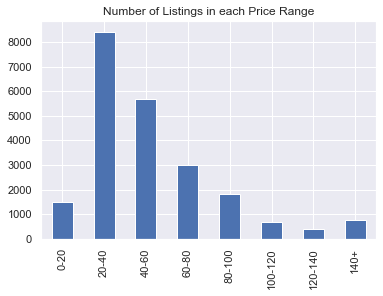

In [17]:
price_range = pd.cut(listings["price"], 
                     bins=[0, 20, 40, 60, 80, 100, 120, 140, listings["price"].max()], 
                     labels=["0-20", "20-40", "40-60", "60-80", "80-100", "100-120", "120-140", "140+"])
listings["price_range"] = price_range 
listings["price_range"].value_counts().sort_index().plot(kind="bar")
plt.title("Number of Listings in each Price Range")
plt.show()

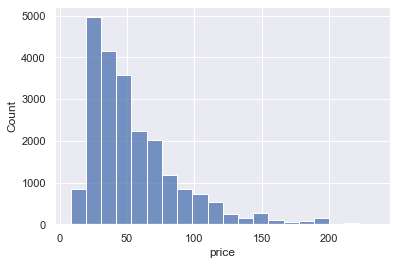

In [18]:
sns.histplot(listings['price'],bins=20);

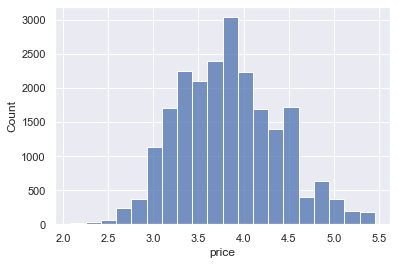

In [19]:
sns.histplot(np.log(listings["price"]),bins=20);

In [20]:

listings.drop(['price_range'], axis='columns', inplace=True)

In [21]:
listings.cleaning_fee.fillna('$0.00', inplace=True)
listings.cleaning_fee = listings.cleaning_fee.str.replace('$', '').str.replace(',', '').astype(float).astype(int)
listings.cleaning_fee.isna().sum()

C:\Users\ashut\AppData\Local\Temp\ipykernel_9464\4232624428.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings.cleaning_fee = listings.cleaning_fee.str.replace('$', '').str.replace(',', '').astype(float).astype(int)


0

In [22]:
np.corrcoef(listings.cleaning_fee,listings.price)

array([[1.        , 0.40095257],
       [0.40095257, 1.        ]])

In [23]:
listings.host_is_superhost.isna().sum()

25

In [24]:
listings['host_is_superhost'].value_counts(1)

f    0.867722
t    0.132278
Name: host_is_superhost, dtype: float64

In [25]:
# replacing NaN's with value 'false' for not being a superhost
listings.host_is_superhost.fillna(value='f', inplace=True)
listings.host_is_superhost.isna().sum()

0

In [26]:
listings['host_is_superhost'].value_counts(1)

f    0.867871
t    0.132129
Name: host_is_superhost, dtype: float64

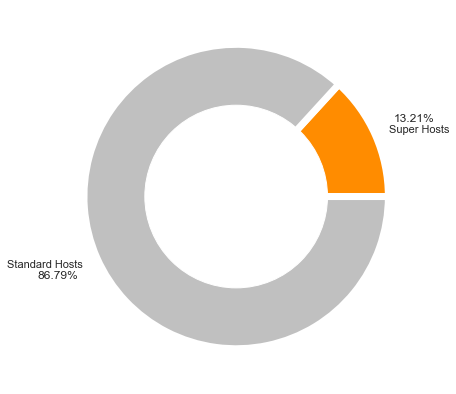

In [27]:
super_host    = listings.host_is_superhost.value_counts()['t']
no_super_host = listings.host_is_superhost.value_counts()['f']
names = ['Super Hosts','Standard Hosts']
size  = [super_host, no_super_host]
# creating a pie chart
plt.pie(size, labels=names, colors=['darkorange','silver'], 
        autopct='%.2f%%', pctdistance=1.28,
        wedgeprops={'linewidth':7, 'edgecolor':'white'})

# creating circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plotting the donut chart
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.show()

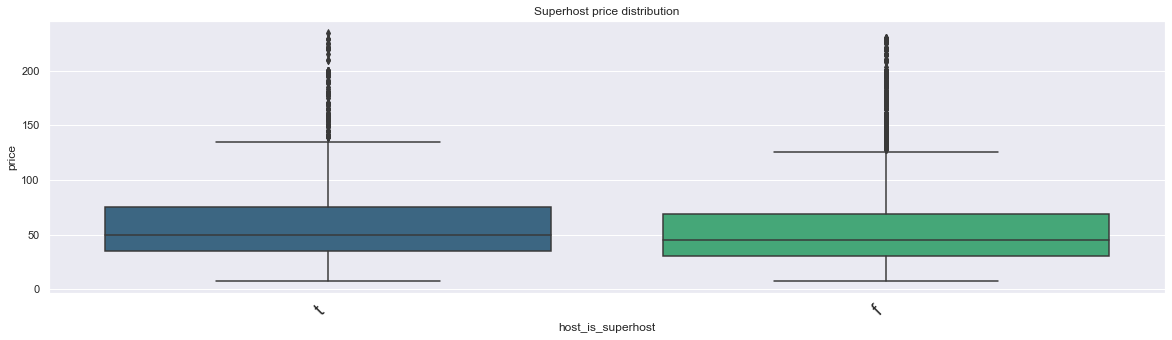

In [28]:
plt.figure(figsize=(20,5))
chart=sns.boxplot(x="host_is_superhost", y="price", data=listings, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Superhost price distribution')
chart;

In [29]:
lat = listings['latitude'].tolist()
lon = listings['longitude'].tolist()
locations = list(zip(lat, lon))

# 52.5200° N, 13.4050° E - latitude and longitude of berlin

map1 = folium.Map(location=[52.5200, 13.4050], zoom_start=12)
FastMarkerCluster(locations).add_to(map1)
map1

In [30]:
from math import sin, cos, sqrt, atan2, radians
def distance(lat1, lat2, lon1, lon2):
    R = 6373.0 # Approximate radius of earth in KM
    rlat1 = radians(lat1)
    rlat2 = radians(lat2)
    rlon1 = radians(lon1)
    rlon2 = radians(lon2)
    rdlon = rlon2 - rlon1
    rdlat = rlat2 - rlat1
    a = sin(rdlat / 2)**2 + cos(rlat1) * cos(rlat2) * sin(rdlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

In [31]:
# Top locations in Berlin
toploc = {"hbf": [52.525293, 13.369359], 
          "txl": [52.558794, 13.288437], 
          "btor": [52.516497, 13.377683], 
          "museum": [52.517693, 13.402141], 
          "reichstag": [52.518770, 13.376166]}
toploc = pd.DataFrame.from_dict(toploc)
# print(toploc)
toploc_trans = toploc.transpose()
toploc_trans.columns = ["latitude", "longitude"]
# print(toploc_trans)
# toploc_trans.info()

# Constructing distance columns
dist = []
for col in toploc.columns:
    listings["dist_"+col] = listings.apply(lambda x: distance(x.latitude, toploc[col][0], x.longitude, toploc[col][1]), axis=1)
    dist.append("dist_"+col)

print(dist)

['dist_hbf', 'dist_txl', 'dist_btor', 'dist_museum', 'dist_reichstag']


In [32]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22198 entries, 0 to 22551
Data columns (total 73 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22198 non-null  int64  
 1   scrape_id                         22198 non-null  float64
 2   last_scraped                      22198 non-null  int64  
 3   experiences_offered               22198 non-null  object 
 4   host_id                           22198 non-null  int64  
 5   host_name                         22173 non-null  object 
 6   host_since                        22173 non-null  object 
 7   host_location                     22085 non-null  object 
 8   host_is_superhost                 22198 non-null  object 
 9   host_neighbourhood                17182 non-null  object 
 10  host_listings_count               22173 non-null  float64
 11  host_total_listings_count         22173 non-null  float64
 12  host

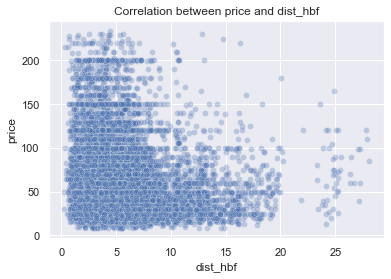

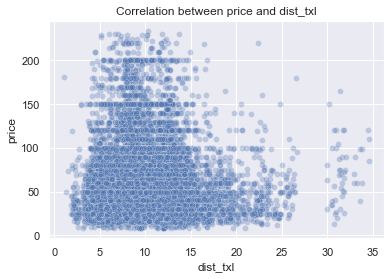

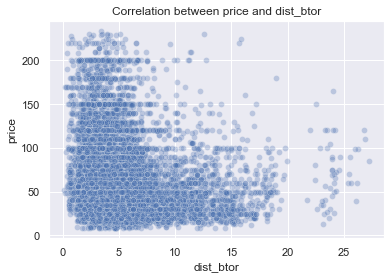

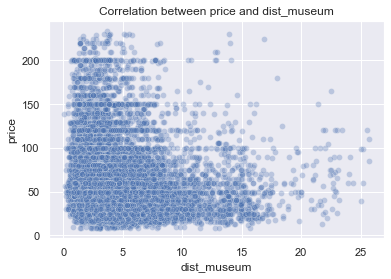

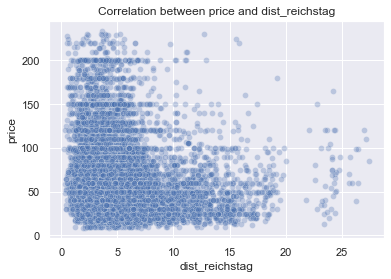

In [33]:
from scipy import stats
for distance in dist:
    sns.scatterplot(x=distance, y="price", data=listings, alpha=0.3)
    plt.title("Correlation between price and "+distance)
    plt.show()

In [34]:
listings['dist_average'] = listings[['dist_hbf', 'dist_txl', 'dist_btor', 'dist_museum', 'dist_reichstag']].mean(axis=1) 


In [35]:
listings[['dist_hbf', 'dist_txl', 'dist_btor', 'dist_museum', 'dist_reichstag','dist_average']].head()

,dist_hbf,dist_txl,dist_btor,dist_museum,dist_reichstag,dist_average
0,2.470531,8.177076,2.619164,1.873802,2.503054,3.528725
1,3.512827,7.935716,3.998364,3.431962,3.825405,4.540855
2,3.436703,9.127423,3.394579,2.189884,3.333330,4.296384
3,3.245779,7.828150,2.757640,4.159571,2.876309,4.173490
4,3.677298,8.740897,3.898852,2.964838,3.780919,4.612561


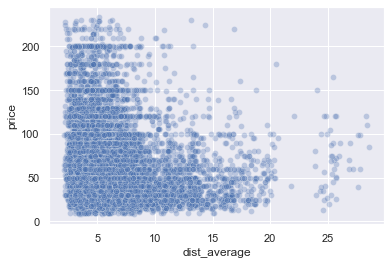

In [36]:
sns.scatterplot(x='dist_average', y="price", data=listings, alpha=0.3);

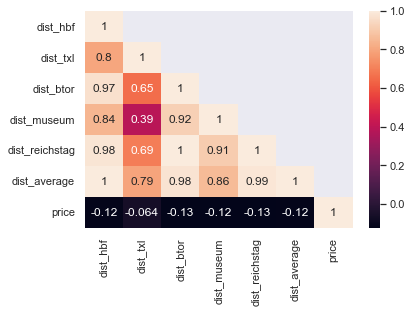

In [37]:
sns.heatmap(listings[['dist_hbf','dist_txl','dist_btor','dist_museum','dist_reichstag','dist_average','price']].corr(),
            annot=True, mask=np.triu(listings[['dist_hbf','dist_txl','dist_btor','dist_museum','dist_reichstag','dist_average','price']].corr(),+1));

In [38]:
listings['amenities'].unique()

array(['{TV,"Cable TV",Wifi,Kitchen,Gym,Heating,"Family/kid friendly","Smoke detector",Essentials,Shampoo,"Lock on bedroom door",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Private living room",Bathtub,"Hot water","Bed linens","Extra pillows and blankets",Microwave,"Coffee maker",Refrigerator,Dishwasher,"Dishes and silverware","Cooking basics",Stove,"Luggage dropoff allowed","Long term stays allowed"}',
       '{Wifi,Kitchen,Elevator,Heating,Washer,Essentials,Shampoo,"Hair dryer","Laptop friendly workspace","Private living room"}',
       '{Internet,Wifi,Kitchen,"Buzzer/wireless intercom",Heating,"Family/kid friendly",Washer,"Smoke detector","Carbon monoxide detector","First aid kit","Safety card","Fire extinguisher",Essentials,Shampoo,"24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace"}',
       ...,
       '{Wifi,Kitchen,Heating,Washer,"Fire extinguisher",Essentials,Iron,"Hot water"}',
       '{Wifi,"Paid parking off premises",Doorman,Elevator,Heating,

In [39]:
from collections import Counter
amenities = Counter()
listings['amenities'].str.strip('{}')\
               .str.replace('"', '')\
               .str.lstrip('\"')\
               .str.rstrip('\"')\
               .str.split(',')\
               .apply(amenities.update)

amenities.most_common(10)

[('Wifi', 21184),
 ('Kitchen', 21022),
 ('Heating', 20880),
 ('Essentials', 20009),
 ('Washer', 18240),
 ('Hair dryer', 14609),
 ('Laptop friendly workspace', 14209),
 ('Hangers', 13633),
 ('Iron', 10954),
 ('Shampoo', 10437)]

In [40]:
listings['Laptop_friendly_workspace'] = listings['amenities'].str.contains('Laptop friendly workspace')
listings['TV'] = listings['amenities'].str.contains('TV')
listings['Hot water']=listings['amenities'].str.contains('Hot water')
listings['Family_friendly'] = listings['amenities'].str.contains('Family/kid friendly')
listings['Hair_dryer'] = listings['amenities'].str.contains('Hair_dryer')
listings['Smoking_allowed'] = listings['amenities'].str.contains('Smoking allowed')
listings.to_csv('modified.csv')

In [41]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22198 entries, 0 to 22551
Data columns (total 80 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22198 non-null  int64  
 1   scrape_id                         22198 non-null  float64
 2   last_scraped                      22198 non-null  int64  
 3   experiences_offered               22198 non-null  object 
 4   host_id                           22198 non-null  int64  
 5   host_name                         22173 non-null  object 
 6   host_since                        22173 non-null  object 
 7   host_location                     22085 non-null  object 
 8   host_is_superhost                 22198 non-null  object 
 9   host_neighbourhood                17182 non-null  object 
 10  host_listings_count               22173 non-null  float64
 11  host_total_listings_count         22173 non-null  float64
 12  host

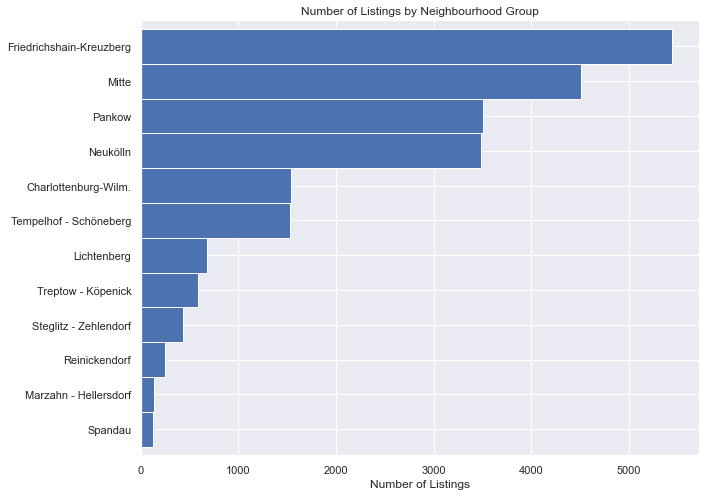

In [42]:
freq = listings['neighbourhood_group_cleansed'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(10, 8), width=1)
plt.title("Number of Listings by Neighbourhood Group")
plt.xlabel('Number of Listings')
plt.show()

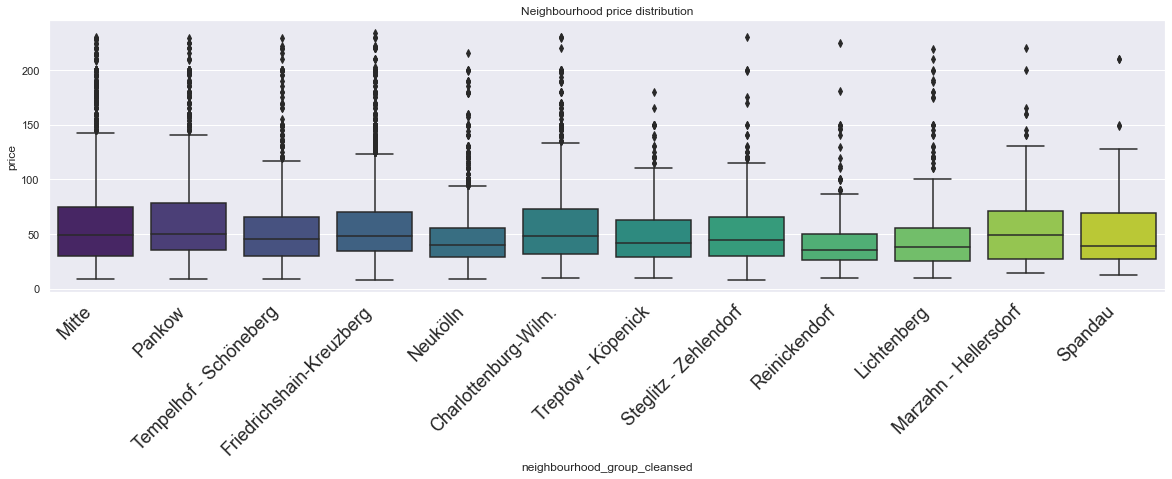

In [43]:
plt.figure(figsize=(20,5))
chart=sns.boxplot(x="neighbourhood_group_cleansed", y="price", data=listings, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Neighbourhood price distribution')
chart;

1.0    17064
2.0     2886
0.0     1469
3.0      629
4.0      110
5.0       14
6.0        5
8.0        1
7.0        1
9.0        1
Name: bedrooms, dtype: int64 



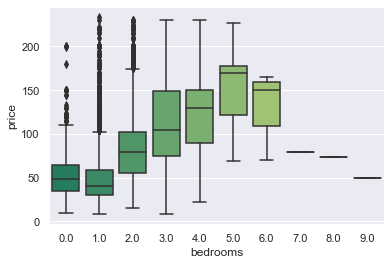

In [44]:
# number of bedrooms of each property
print(listings['bedrooms'].value_counts(),'\n')

# distribution of bedrooms with price
sns.boxplot(x="bedrooms", y="price", data=listings,palette="summer");

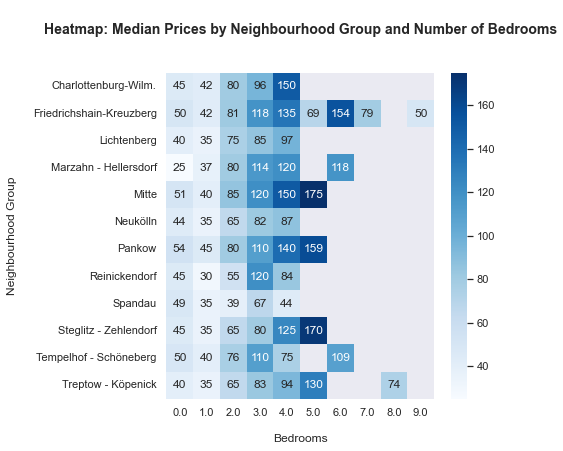

In [45]:
plt.figure(figsize=(6,6))
sns.heatmap(listings.groupby(['neighbourhood_group_cleansed', 'bedrooms']).price.median().unstack(), 
            cmap='Blues', annot=True, fmt=".0f")

plt.xlabel('\nBedrooms', fontsize=12)
plt.ylabel('Neighbourhood Group\n', fontsize=12)
plt.title('\nHeatmap: Median Prices by Neighbourhood Group and Number of Bedrooms\n\n', fontsize=14, fontweight='bold');

In [46]:
listings['cancellation_policy'].value_counts()

flexible                       9000
moderate                       7014
strict_14_with_grace_period    6128
super_strict_30                  48
super_strict_60                   8
Name: cancellation_policy, dtype: int64

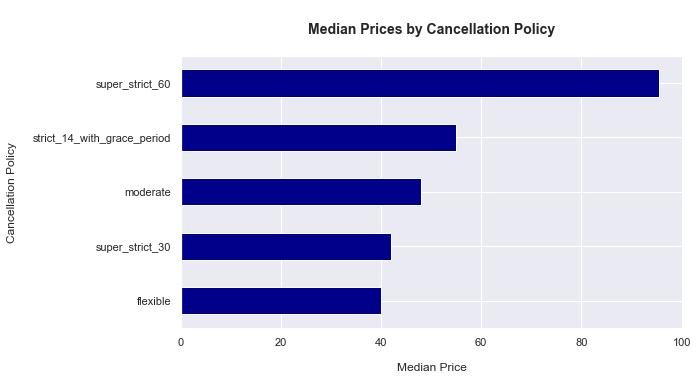

In [47]:
listings_grouped = pd.DataFrame(listings.groupby(['cancellation_policy'])['price'].agg(np.median))
listings_grouped.reset_index(inplace=True)

listings_grouped.sort_values(by=['price'], ascending=True)\
          .plot(kind='barh', x='cancellation_policy', y='price', 
                figsize=(9,5), legend=False, color='darkblue')

plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('Cancellation Policy\n', fontsize=12)
plt.title('\nMedian Prices by Cancellation Policy\n', fontsize=14, fontweight='bold');

In [48]:
listings.property_type.unique()

array(['Guesthouse', 'Apartment', 'Condominium', 'Loft', 'House',
       'Serviced apartment', 'Townhouse', 'Boutique hotel',
       'Bed and breakfast', 'Bungalow', 'Boat', 'Guest suite', 'Other',
       'Island', 'Hostel', 'Train', 'Camper/RV', 'Houseboat', 'Cabin',
       'Cottage', 'Tiny house', 'Chalet', 'Castle', 'Villa', 'Aparthotel',
       'Hotel', 'Tipi', 'Resort', 'In-law', 'Cave', 'Barn',
       'Pension (South Korea)', 'Casa particular (Cuba)'], dtype=object)

In [49]:
listings['property_type'].value_counts()

Apartment                 20012
Condominium                 597
Loft                        431
House                       382
Serviced apartment          149
Hostel                      123
Townhouse                    94
Guest suite                  73
Bed and breakfast            64
Guesthouse                   54
Other                        44
Boutique hotel               34
Hotel                        31
Bungalow                     19
Boat                         13
Tiny house                   12
Camper/RV                    11
Villa                        10
Houseboat                     7
Pension (South Korea)         7
Cabin                         6
Aparthotel                    6
Cottage                       4
Resort                        3
Train                         2
Castle                        2
Casa particular (Cuba)        2
Chalet                        1
Island                        1
Tipi                          1
In-law                        1
Cave    

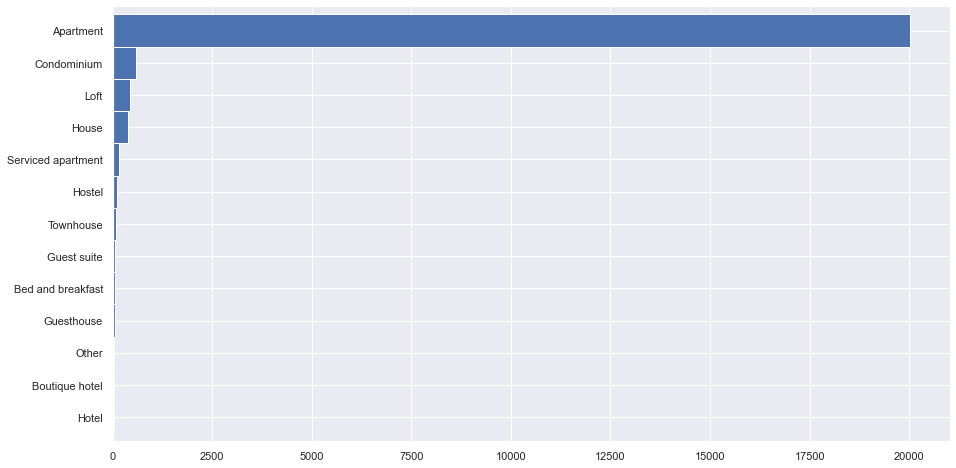

In [50]:
freq = listings['property_type'].value_counts().sort_values(ascending=True)
freq = freq[freq > 20]  # Eliminating types less than 20 counts.
freq.plot.barh(figsize=(15, 8), width=1)
# plt.xscale('log')
plt.show()

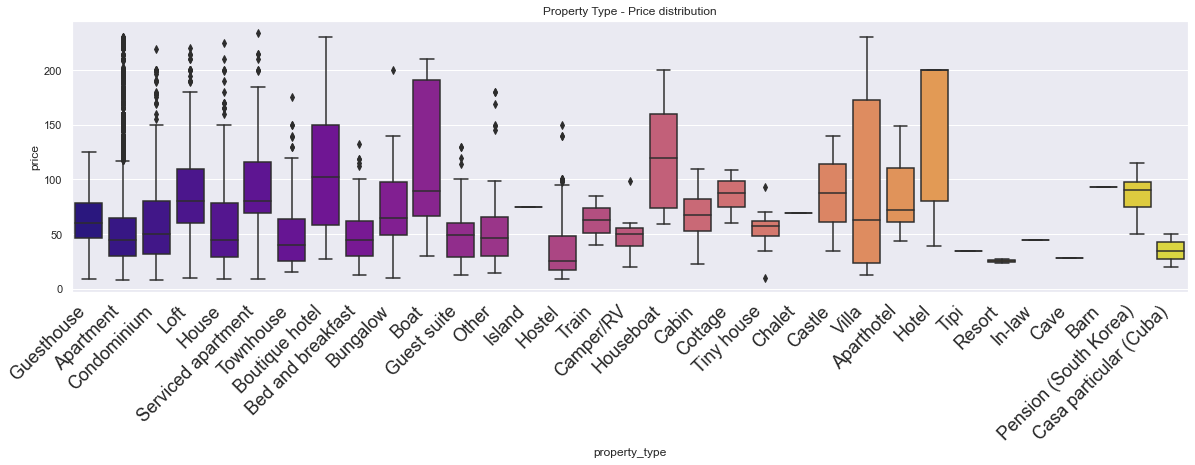

In [51]:
plt.figure(figsize=(20,5))
chart=sns.boxplot(x="property_type", y="price", data=listings, palette="plasma")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Property Type - Price distribution')
chart;

In [52]:
listings = listings[(listings.property_type == 'Apartment' )] 

In [53]:
listings.host_has_profile_pic.unique()

array(['t', nan, 'f'], dtype=object)

In [54]:
freq = listings['host_has_profile_pic'].value_counts().sort_values(ascending=True)
freq

f       51
t    19938
Name: host_has_profile_pic, dtype: int64

In [55]:
listings.host_identity_verified.unique()

array(['t', 'f', nan], dtype=object)

In [56]:
freq = listings['host_identity_verified'].value_counts().sort_values(ascending=True)
freq

t     7865
f    12124
Name: host_identity_verified, dtype: int64

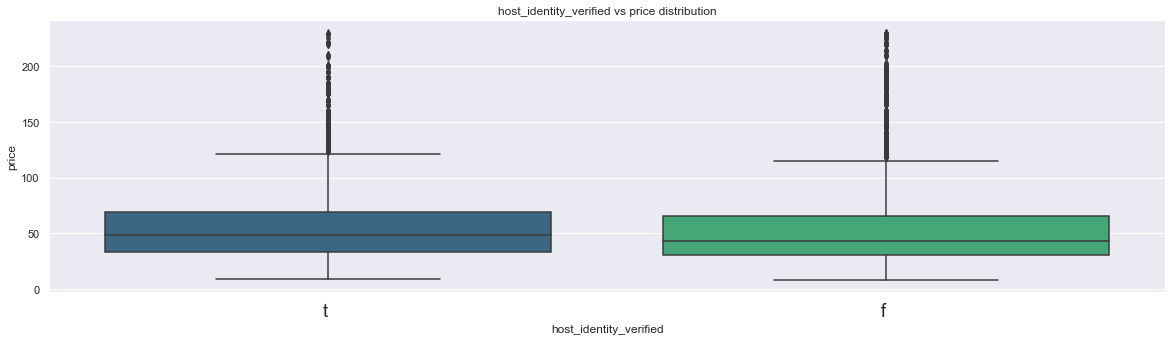

In [57]:
plt.figure(figsize=(20,5))
chart=sns.boxplot(x="host_identity_verified", y="price", data=listings, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), horizontalalignment='right', fontsize=18)
plt.title('host_identity_verified vs price distribution')
chart;

In [58]:
listings.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

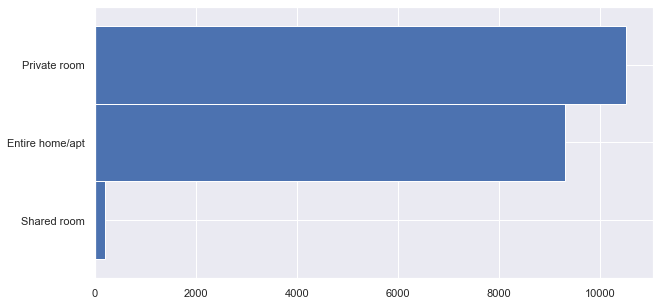

In [59]:
freq = listings['room_type'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(10, 5), width=1)
plt.show()

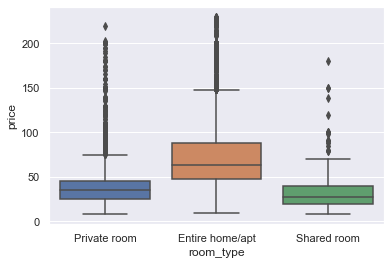

In [60]:
sns.boxplot(x="room_type", y="price", data=listings);

In [61]:
listings['accommodates'].value_counts().sort_index()

1      2494
2     11153
3      2246
4      2787
5       575
6       515
7        79
8       100
9        24
10       19
11        6
12       12
14        1
15        1
Name: accommodates, dtype: int64

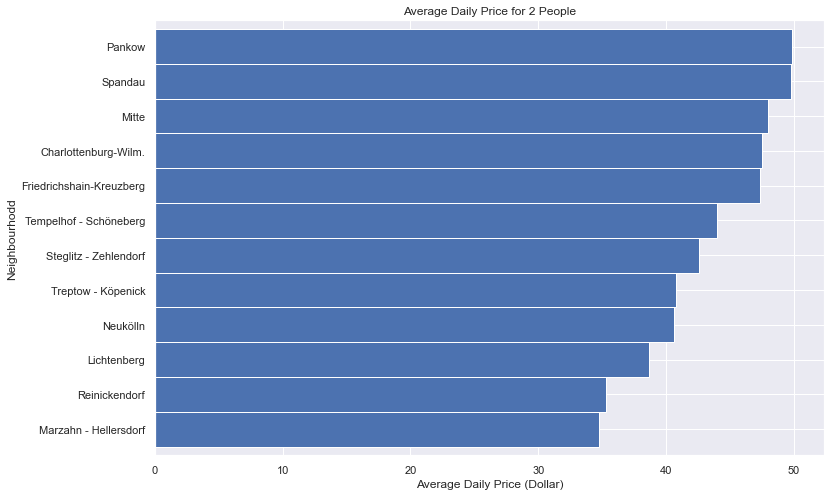

In [62]:
freq = listings[listings['accommodates']==2]
freq = freq.groupby('neighbourhood_group_cleansed')['price'].mean().sort_values(ascending=True)
freq.plot.barh(figsize=(12, 8), width=1)
plt.title("Average Daily Price for 2 People")
plt.xlabel('Average Daily Price (Dollar)')
plt.ylabel("Neighbourhodd")
plt.show()

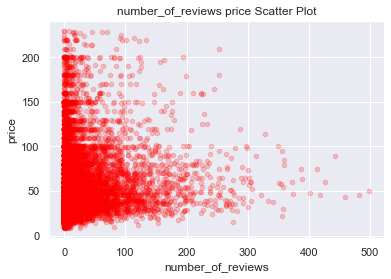

In [63]:
listings.plot(kind='scatter', x='number_of_reviews', y='price',alpha =0.2 ,color = 'red')
plt.xlabel('number_of_reviews')              # label = name of label
plt.ylabel('price')
plt.title('number_of_reviews price Scatter Plot')            # title = title of plot
plt.show()

In [64]:
listings['experiences_offered'].unique()

array(['none'], dtype=object)

In [65]:
listings['host_since']

1        16-09-2008
2        19-10-2008
3        07-11-2008
4        16-05-2009
5        25-08-2009
            ...    
22545    02-01-2018
22546    15-09-2014
22547    02-08-2016
22548    17-04-2016
22551    09-03-2018
Name: host_since, Length: 20012, dtype: object

In [66]:
pd.DatetimeIndex(listings['host_since'])

C:\Users\ashut\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '16-09-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\ashut\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '19-10-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\ashut\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '16-05-2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\ashut\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\datetimes.py:327: User

DatetimeIndex(['2008-09-16', '2008-10-19', '2008-07-11', '2009-05-16',
               '2009-08-25', '2009-11-18', '2009-03-12', '2009-12-20',
               '2010-08-01', '2009-12-20',
               ...
               '2015-01-21', '2014-05-09', '2018-06-11', '2017-02-17',
               '2013-10-20', '2018-02-01', '2014-09-15', '2016-02-08',
               '2016-04-17', '2018-09-03'],
              dtype='datetime64[ns]', name='host_since', length=20012, freq=None)

In [67]:
listings['year'] = pd.DatetimeIndex(listings['host_since']).year
listings['year']

1        2008.0
2        2008.0
3        2008.0
4        2009.0
5        2009.0
          ...  
22545    2018.0
22546    2014.0
22547    2016.0
22548    2016.0
22551    2018.0
Name: year, Length: 20012, dtype: float64

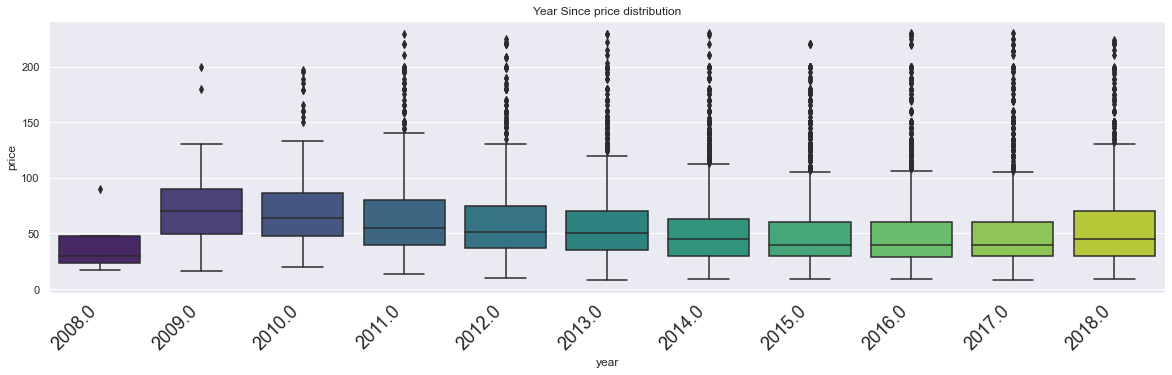

In [68]:
plt.figure(figsize=(20,5))
chart=sns.boxplot(x="year", y="price", data=listings, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Year Since price distribution')
chart;

In [69]:
freq = listings['is_location_exact'].value_counts().sort_values(ascending=True)
freq

f     5223
t    14789
Name: is_location_exact, dtype: int64

In [70]:
listings[['host_total_listings_count','host_listings_count','calculated_host_listings_count']].corr()

,host_total_listings_count,host_listings_count,calculated_host_listings_count
host_total_listings_count,1.000000,1.000000,0.171067
host_listings_count,1.000000,1.000000,0.171067
calculated_host_listings_count,0.171067,0.171067,1.000000


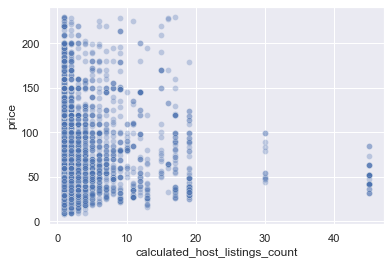

In [71]:
sns.scatterplot(x='calculated_host_listings_count', y="price", data=listings, alpha=0.3);

In [72]:
listings['bathrooms'].value_counts()

1.0    17943
1.5      960
2.0      907
0.5       88
2.5       39
0.0       22
3.0       12
4.0        5
7.5        2
8.0        2
3.5        1
7.0        1
Name: bathrooms, dtype: int64

In [73]:
listings['bedrooms'].value_counts()

1.0    15536
2.0     2583
0.0     1269
3.0      526
4.0       76
5.0        8
6.0        3
Name: bedrooms, dtype: int64

In [74]:
listings['beds'].value_counts()

1.0     13180
2.0      4696
3.0      1132
4.0       577
5.0       185
6.0       119
7.0        33
8.0        28
0.0        20
9.0        10
10.0        5
15.0        1
11.0        1
12.0        1
Name: beds, dtype: int64

In [75]:
listings['bed_type'].value_counts()

Real Bed         19305
Pull-out Sofa      411
Futon              212
Couch               63
Airbed              21
Name: bed_type, dtype: int64

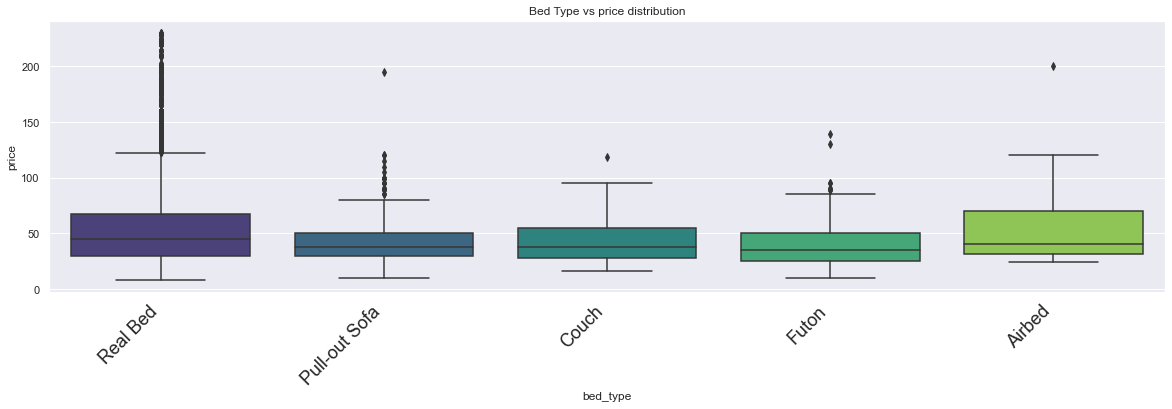

In [76]:
plt.figure(figsize=(20,5))
chart=sns.boxplot(x="bed_type", y="price", data=listings, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Bed Type vs price distribution')
chart;

In [77]:
listings['guests_included'].value_counts()

1     15713
2      3478
4       398
3       316
5        42
6        41
8         6
16        5
7         5
9         3
14        1
10        1
12        1
11        1
13        1
Name: guests_included, dtype: int64

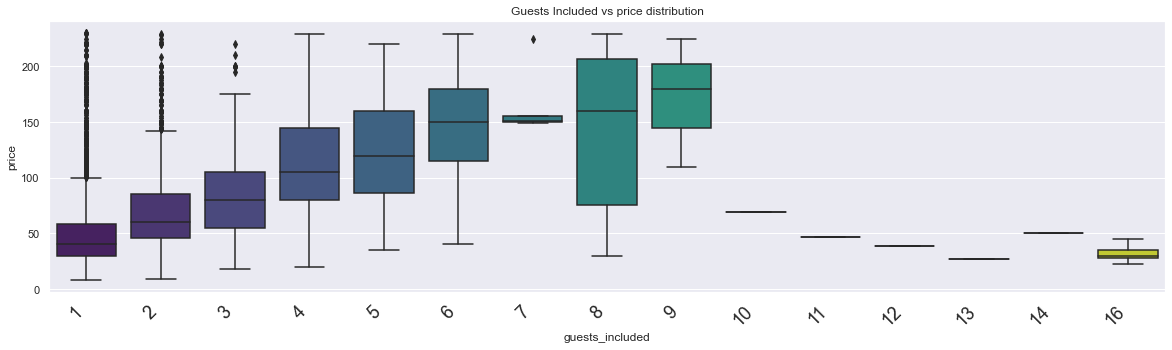

In [78]:
plt.figure(figsize=(20,5))
chart=sns.boxplot(x="guests_included", y="price", data=listings, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Guests Included vs price distribution')
chart;

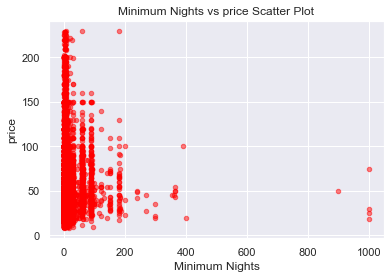

In [79]:
listings.plot(kind='scatter', x='minimum_nights', y='price',alpha = 0.5,color = 'red')
plt.xlabel('Minimum Nights')              
plt.ylabel('price')
plt.title('Minimum Nights vs price Scatter Plot')            
plt.show()

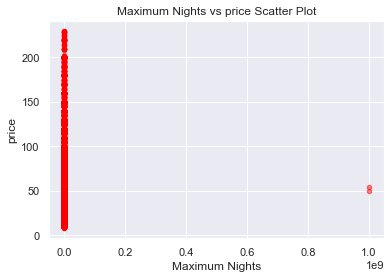

In [80]:
listings.plot(kind='scatter', x='maximum_nights', y='price',alpha = 0.5,color = 'red')
plt.xlabel('Maximum Nights')             
plt.ylabel('price')
plt.title('Maximum Nights vs price Scatter Plot')            
plt.show()

In [81]:
listings['has_availability'].value_counts()

t    20012
Name: has_availability, dtype: int64

In [82]:
listings['availability_30'].value_counts()

0     13419
6       445
1       412
4       382
5       344
29      330
2       316
3       313
7       277
8       255
30      254
9       227
12      196
11      193
14      193
23      188
28      186
10      186
27      184
15      166
13      160
20      154
17      154
18      154
16      152
25      144
19      143
22      138
21      133
24      115
26       99
Name: availability_30, dtype: int64

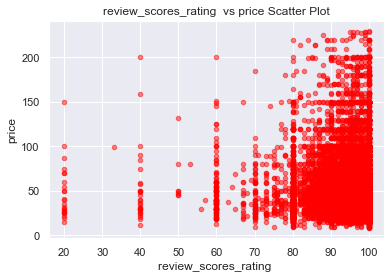

In [83]:
listings.plot(kind='scatter', x='review_scores_rating', y='price',alpha = 0.5,color = 'red')
plt.xlabel('review_scores_rating ')              # label = name of label
plt.ylabel('price')
plt.title('review_scores_rating  vs price Scatter Plot')            # title = title of plot
plt.show()

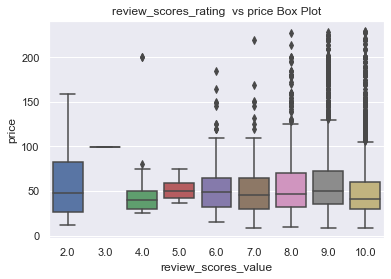

In [84]:
sns.boxplot(x='review_scores_value',y='price',data=listings)
plt.title('review_scores_rating  vs price Box Plot')
plt.show()

In [85]:
listings['instant_bookable'].value_counts()

f    13940
t     6072
Name: instant_bookable, dtype: int64

In [86]:
listings['requires_license'].value_counts()

t    20008
f        4
Name: requires_license, dtype: int64

In [87]:
listings['is_business_travel_ready'].value_counts()

f    20012
Name: is_business_travel_ready, dtype: int64

In [88]:
listings['require_guest_profile_picture'].value_counts()

f    19877
t      135
Name: require_guest_profile_picture, dtype: int64

In [89]:
listings['require_guest_phone_verification'].value_counts()

f    19795
t      217
Name: require_guest_phone_verification, dtype: int64

In [90]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20012 entries, 1 to 22551
Data columns (total 81 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                20012 non-null  int64  
 1   scrape_id                         20012 non-null  float64
 2   last_scraped                      20012 non-null  int64  
 3   experiences_offered               20012 non-null  object 
 4   host_id                           20012 non-null  int64  
 5   host_name                         19989 non-null  object 
 6   host_since                        19989 non-null  object 
 7   host_location                     19909 non-null  object 
 8   host_is_superhost                 20012 non-null  object 
 9   host_neighbourhood                15377 non-null  object 
 10  host_listings_count               19989 non-null  float64
 11  host_total_listings_count         19989 non-null  float64
 12  host

In [91]:
listings['year']= listings['year'].astype(object)

In [92]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20012 entries, 1 to 22551
Data columns (total 81 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                20012 non-null  int64  
 1   scrape_id                         20012 non-null  float64
 2   last_scraped                      20012 non-null  int64  
 3   experiences_offered               20012 non-null  object 
 4   host_id                           20012 non-null  int64  
 5   host_name                         19989 non-null  object 
 6   host_since                        19989 non-null  object 
 7   host_location                     19909 non-null  object 
 8   host_is_superhost                 20012 non-null  object 
 9   host_neighbourhood                15377 non-null  object 
 10  host_listings_count               19989 non-null  float64
 11  host_total_listings_count         19989 non-null  float64
 12  host

In [93]:
listings = pd.get_dummies(listings, columns=['host_is_superhost','host_identity_verified','neighbourhood_group_cleansed','is_location_exact','property_type','room_type','bed_type','instant_bookable','cancellation_policy','Laptop_friendly_workspace','TV','Hot water','Family_friendly','Hair_dryer','Smoking_allowed','year'],drop_first=True)

C:\Users\ashut\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [94]:
listings.info()
listings.to_csv('modified.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20012 entries, 1 to 22551
Columns: 105 entries, id to year_2018.0
dtypes: float64(25), int32(1), int64(14), object(25), uint8(40)
memory usage: 10.8+ MB


In [95]:
listings.rename(columns = {'neighbourhood_group_cleansed_Marzahn - Hellersdorf':'neighbourhood_group_cleansed_Marzahn_Hellersdorf','neighbourhood_group_cleansed_Steglitz - Zehlendorf':'neighbourhood_group_cleansed_Steglitz_Zehlendorf','neighbourhood_group_cleansed_Tempelhof - Schöneberg':'neighbourhood_group_cleansed_Tempelhof_Schöneberg', 'neighbourhood_group_cleansed_Treptow - Köpenick':'neighbourhood_group_cleansed_Treptow_Köpenick','bed_type_Pull-out Sofa':'bed_type_Pull_out_Sofa', 'bed_type_Real Bed':'bed_type_Real_Bed','room_type_Private room':'room_type_Private_room','room_type_Shared room':'room_type_Shared_room','Hot water_True':'Hot_water_True', 'year_2009.0':'year_2009','year_2010.0':'year_2010','year_2011.0':'year_2011','year_2012.0':'year_2012','year_2013.0':'year_2013','year_2014.0':'year_2014','year_2015.0':'year_2015','year_2016.0':'year_2016','year_2017.0':'year_2017','year_2018.0':'year_2018'}, inplace=True)

In [96]:
listings_new = listings[['host_total_listings_count','accommodates','guests_included','availability_30','availability_60',
'availability_90','availability_365','number_of_reviews','review_scores_rating','review_scores_accuracy',
'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location',
'review_scores_value','calculated_host_listings_count','dist_average','bathrooms','bedrooms',
'host_is_superhost_t','host_identity_verified_t','neighbourhood_group_cleansed_Lichtenberg',
'neighbourhood_group_cleansed_Mitte','neighbourhood_group_cleansed_Neukölln',
'neighbourhood_group_cleansed_Tempelhof_Schöneberg','neighbourhood_group_cleansed_Treptow_Köpenick',
'neighbourhood_group_cleansed_Steglitz_Zehlendorf','neighbourhood_group_cleansed_Pankow',
'neighbourhood_group_cleansed_Marzahn_Hellersdorf','neighbourhood_group_cleansed_Reinickendorf',
'neighbourhood_group_cleansed_Spandau','is_location_exact_t','room_type_Private_room','room_type_Shared_room',                               
'bed_type_Couch','bed_type_Futon','bed_type_Pull_out_Sofa','bed_type_Real_Bed','instant_bookable_t',
'cancellation_policy_moderate','cancellation_policy_strict_14_with_grace_period','cancellation_policy_super_strict_30',
'cancellation_policy_super_strict_60','Laptop_friendly_workspace_True','TV_True','Hot_water_True','Family_friendly_True',
'Smoking_allowed_True','year_2009','year_2010','year_2011','year_2012','year_2013','year_2014','year_2015','year_2016',
'year_2017','year_2018','price']]

In [97]:
listings_new.isna().sum()

host_total_listings_count                              23
accommodates                                            0
guests_included                                         0
availability_30                                         0
availability_60                                         0
availability_90                                         0
availability_365                                        0
number_of_reviews                                       0
review_scores_rating                                 3834
review_scores_accuracy                               3856
review_scores_cleanliness                            3854
review_scores_checkin                                3871
review_scores_communication                          3857
review_scores_location                               3870
review_scores_value                                  3874
calculated_host_listings_count                          0
dist_average                                            0
bathrooms     

In [98]:
listings_new["review_scores_value"].replace(np.nan,listings_new["review_scores_value"].median(),inplace=True)
listings_new["review_scores_checkin"].replace(np.nan,listings_new["review_scores_checkin"].median(),inplace=True)
listings_new["review_scores_location"].replace(np.nan,listings_new["review_scores_location"].median(),inplace=True)
listings_new["review_scores_communication"].replace(np.nan,listings_new["review_scores_communication"].median(),inplace=True)
listings_new["review_scores_accuracy"].replace(np.nan,listings_new["review_scores_accuracy"].median(),inplace=True)
listings_new["review_scores_cleanliness"].replace(np.nan,listings_new["review_scores_cleanliness"].median(),inplace=True)
listings_new["review_scores_rating"].replace(np.nan,listings_new["review_scores_rating"].median(),inplace=True)

C:\Users\ashut\AppData\Local\Temp\ipykernel_9464\2398352969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_new["review_scores_value"].replace(np.nan,listings_new["review_scores_value"].median(),inplace=True)
C:\Users\ashut\AppData\Local\Temp\ipykernel_9464\2398352969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_new["review_scores_checkin"].replace(np.nan,listings_new["review_scores_checkin"].median(),inplace=True)
C:\Users\ashut\AppData\Local\Temp\ipykernel_9464\2398352969.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in t

In [99]:
listings_new.isna().sum()

host_total_listings_count                            23
accommodates                                          0
guests_included                                       0
availability_30                                       0
availability_60                                       0
availability_90                                       0
availability_365                                      0
number_of_reviews                                     0
review_scores_rating                                  0
review_scores_accuracy                                0
review_scores_cleanliness                             0
review_scores_checkin                                 0
review_scores_communication                           0
review_scores_location                                0
review_scores_value                                   0
calculated_host_listings_count                        0
dist_average                                          0
bathrooms                                       

In [100]:
listings_new.dropna(axis=0, inplace=True)

C:\Users\ashut\AppData\Local\Temp\ipykernel_9464\3741322208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_new.dropna(axis=0, inplace=True)


In [101]:
listings_new.isna().sum()
listings.to_csv('modified.csv')

In [102]:
from sklearn.model_selection import train_test_split
Train, Test = train_test_split(listings_new, test_size=0.30 , random_state=1)

In [103]:
from IPython.display import display

In [104]:
display(Train.head())

print(Train.shape)

,host_total_listings_count,accommodates,guests_included,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,dist_average,bathrooms,bedrooms,host_is_superhost_t,host_identity_verified_t,neighbourhood_group_cleansed_Lichtenberg,neighbourhood_group_cleansed_Mitte,neighbourhood_group_cleansed_Neukölln,neighbourhood_group_cleansed_Tempelhof_Schöneberg,neighbourhood_group_cleansed_Treptow_Köpenick,neighbourhood_group_cleansed_Steglitz_Zehlendorf,neighbourhood_group_cleansed_Pankow,neighbourhood_group_cleansed_Marzahn_Hellersdorf,neighbourhood_group_cleansed_Reinickendorf,neighbourhood_group_cleansed_Spandau,is_location_exact_t,room_type_Private_room,room_type_Shared_room,bed_type_Couch,bed_type_Futon,bed_type_Pull_out_Sofa,bed_type_Real_Bed,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,Laptop_friendly_workspace_True,TV_True,Hot_water_True,Family_friendly_True,Smoking_allowed_True,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,price
3563,1.0,2,1,0,0,0,0,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,4.004408,1.0,1.0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,25.0
19516,1.0,4,1,3,11,11,11,26,93.0,10.0,10.0,9.0,10.0,10.0,9.0,1,3.785439,1.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,65.0
3850,1.0,2,1,0,0,0,0,12,85.0,8.0,8.0,9.0,8.0,9.0,8.0,1,5.108552,1.0,1.0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,35.0
9552,1.0,2,1,0,0,0,0,1,100.0,8.0,10.0,10.0,10.0,8.0,10.0,1,4.993363,1.5,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,25.0
19129,1.0,2,1,24,51,81,81,9,85.0,10.0,7.0,9.0,10.0,10.0,9.0,1,4.638516,1.0,1.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,60.0


(13963, 59)


In [105]:
display(Test.head())

print(Test.shape)

,host_total_listings_count,accommodates,guests_included,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,dist_average,bathrooms,bedrooms,host_is_superhost_t,host_identity_verified_t,neighbourhood_group_cleansed_Lichtenberg,neighbourhood_group_cleansed_Mitte,neighbourhood_group_cleansed_Neukölln,neighbourhood_group_cleansed_Tempelhof_Schöneberg,neighbourhood_group_cleansed_Treptow_Köpenick,neighbourhood_group_cleansed_Steglitz_Zehlendorf,neighbourhood_group_cleansed_Pankow,neighbourhood_group_cleansed_Marzahn_Hellersdorf,neighbourhood_group_cleansed_Reinickendorf,neighbourhood_group_cleansed_Spandau,is_location_exact_t,room_type_Private_room,room_type_Shared_room,bed_type_Couch,bed_type_Futon,bed_type_Pull_out_Sofa,bed_type_Real_Bed,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,Laptop_friendly_workspace_True,TV_True,Hot_water_True,Family_friendly_True,Smoking_allowed_True,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,price
20398,3.0,2,1,6,29,30,30,6,93.0,9.0,9.0,9.0,10.0,10.0,9.0,2,5.842225,1.0,1.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,48.0
11390,2.0,1,1,0,0,0,0,6,87.0,9.0,8.0,9.0,9.0,9.0,9.0,2,3.865744,1.0,1.0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,40.0
16783,2.0,1,2,0,0,0,0,12,95.0,10.0,9.0,10.0,10.0,9.0,10.0,1,4.931999,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,28.0
19179,1.0,2,1,0,0,0,0,4,87.0,9.0,9.0,9.0,10.0,10.0,10.0,1,4.539495,1.0,1.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,15.0
6957,6.0,4,2,5,9,34,296,305,98.0,10.0,10.0,10.0,10.0,10.0,10.0,6,3.375046,1.0,1.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,60.0


(5985, 59)


In [106]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ host_total_listings_count+accommodates+guests_included+availability_30+availability_60+availability_90+availability_365+number_of_reviews+review_scores_rating+review_scores_accuracy+review_scores_cleanliness+review_scores_checkin+review_scores_communication+review_scores_location+review_scores_value+calculated_host_listings_count+dist_average+bathrooms+bedrooms+host_is_superhost_t+host_identity_verified_t+neighbourhood_group_cleansed_Lichtenberg++neighbourhood_group_cleansed_Mitte+neighbourhood_group_cleansed_Neukölln+neighbourhood_group_cleansed_Tempelhof_Schöneberg+neighbourhood_group_cleansed_Treptow_Köpenick+neighbourhood_group_cleansed_Steglitz_Zehlendorf+neighbourhood_group_cleansed_Pankow+neighbourhood_group_cleansed_Marzahn_Hellersdorf+neighbourhood_group_cleansed_Reinickendorf+neighbourhood_group_cleansed_Spandau+is_location_exact_t+room_type_Private_room+room_type_Shared_room+bed_type_Couch+bed_type_Futon+bed_type_Pull_out_Sofa+bed_type_Real_Bed+instant_bookable_t+cancellation_policy_moderate+cancellation_policy_strict_14_with_grace_period+cancellation_policy_super_strict_30+cancellation_policy_super_strict_60+Laptop_friendly_workspace_True+TV_True+Hot_water_True+Family_friendly_True+Smoking_allowed_True+year_2009+year_2010+year_2011+year_2012+year_2013+year_2014+year_2015+year_2016+year_2017+year_2018',data = Train).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     254.9
Date:                Mon, 02 May 2022   Prob (F-statistic):               0.00
Time:                        20:52:58   Log-Likelihood:                -63463.
No. Observations:               13963   AIC:                         1.270e+05
Df Residuals:                   13904   BIC:                         1.275e+05
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [107]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=smf.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [108]:
vif_cal(input_data=Train.drop('price',axis=1))

host_total_listings_count  VIF =  1.04
accommodates  VIF =  2.19
guests_included  VIF =  1.34
availability_30  VIF =  8.83
availability_60  VIF =  24.3
availability_90  VIF =  13.79
availability_365  VIF =  2.18
number_of_reviews  VIF =  1.4
review_scores_rating  VIF =  3.0
review_scores_accuracy  VIF =  2.12
review_scores_cleanliness  VIF =  2.0
review_scores_checkin  VIF =  1.84
review_scores_communication  VIF =  1.92
review_scores_location  VIF =  1.44
review_scores_value  VIF =  2.4
calculated_host_listings_count  VIF =  2.37
dist_average  VIF =  3.01
bathrooms  VIF =  1.07
bedrooms  VIF =  1.65
host_is_superhost_t  VIF =  1.25
host_identity_verified_t  VIF =  1.21
neighbourhood_group_cleansed_Lichtenberg  VIF =  1.24
neighbourhood_group_cleansed_Mitte  VIF =  1.82
neighbourhood_group_cleansed_Neukölln  VIF =  1.49
neighbourhood_group_cleansed_Tempelhof_Schöneberg  VIF =  1.14
neighbourhood_group_cleansed_Treptow_Köpenick  VIF =  1.46
neighbourhood_group_cleansed_Steglitz_Zehlendo

In [109]:
vif_cal(input_data=Train.drop(['price','availability_60'],axis=1))

host_total_listings_count  VIF =  1.04
accommodates  VIF =  2.18
guests_included  VIF =  1.34
availability_30  VIF =  3.84
availability_90  VIF =  5.3
availability_365  VIF =  2.14
number_of_reviews  VIF =  1.39
review_scores_rating  VIF =  3.0
review_scores_accuracy  VIF =  2.12
review_scores_cleanliness  VIF =  2.0
review_scores_checkin  VIF =  1.84
review_scores_communication  VIF =  1.92
review_scores_location  VIF =  1.44
review_scores_value  VIF =  2.4
calculated_host_listings_count  VIF =  2.36
dist_average  VIF =  3.01
bathrooms  VIF =  1.07
bedrooms  VIF =  1.65
host_is_superhost_t  VIF =  1.25
host_identity_verified_t  VIF =  1.21
neighbourhood_group_cleansed_Lichtenberg  VIF =  1.24
neighbourhood_group_cleansed_Mitte  VIF =  1.82
neighbourhood_group_cleansed_Neukölln  VIF =  1.49
neighbourhood_group_cleansed_Tempelhof_Schöneberg  VIF =  1.14
neighbourhood_group_cleansed_Treptow_Köpenick  VIF =  1.46
neighbourhood_group_cleansed_Steglitz_Zehlendorf  VIF =  1.24
neighbourhood_

In [110]:
lm2 = smf.ols(formula= 'price ~ accommodates+guests_included+availability_30+availability_90+availability_365+number_of_reviews+review_scores_rating+review_scores_cleanliness+review_scores_communication+review_scores_location+review_scores_value+calculated_host_listings_count+dist_average+bathrooms+bedrooms+host_is_superhost_t+neighbourhood_group_cleansed_Mitte+neighbourhood_group_cleansed_Neukölln+neighbourhood_group_cleansed_Tempelhof_Schöneberg+neighbourhood_group_cleansed_Steglitz_Zehlendorf+neighbourhood_group_cleansed_Pankow+neighbourhood_group_cleansed_Reinickendorf+neighbourhood_group_cleansed_Spandau+room_type_Private_room+room_type_Shared_room+bed_type_Couch+bed_type_Futon+bed_type_Pull_out_Sofa+bed_type_Real_Bed+instant_bookable_t+cancellation_policy_moderate+cancellation_policy_strict_14_with_grace_period+cancellation_policy_super_strict_30+Laptop_friendly_workspace_True+TV_True+Family_friendly_True+Smoking_allowed_True+year_2009+year_2010+year_2011+year_2012+year_2013+year_2014+year_2015+year_2016+year_2017+year_2018',data = Train).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     314.5
Date:                Mon, 02 May 2022   Prob (F-statistic):               0.00
Time:                        20:53:09   Log-Likelihood:                -63468.
No. Observations:               13963   AIC:                         1.270e+05
Df Residuals:                   13915   BIC:                         1.274e+05
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [111]:
y_pred_1_Train = lm1.fittedvalues
y_pred_2_Train = lm2.fittedvalues

y_pred_1_Test = lm1.predict(Test)
y_pred_2_Test = lm2.predict(Test)
display(Test," ",y_pred_2_Test)

,host_total_listings_count,accommodates,guests_included,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,dist_average,bathrooms,bedrooms,host_is_superhost_t,host_identity_verified_t,neighbourhood_group_cleansed_Lichtenberg,neighbourhood_group_cleansed_Mitte,neighbourhood_group_cleansed_Neukölln,neighbourhood_group_cleansed_Tempelhof_Schöneberg,neighbourhood_group_cleansed_Treptow_Köpenick,neighbourhood_group_cleansed_Steglitz_Zehlendorf,neighbourhood_group_cleansed_Pankow,neighbourhood_group_cleansed_Marzahn_Hellersdorf,neighbourhood_group_cleansed_Reinickendorf,neighbourhood_group_cleansed_Spandau,is_location_exact_t,room_type_Private_room,room_type_Shared_room,bed_type_Couch,bed_type_Futon,bed_type_Pull_out_Sofa,bed_type_Real_Bed,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,Laptop_friendly_workspace_True,TV_True,Hot_water_True,Family_friendly_True,Smoking_allowed_True,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,price
20398,3.0,2,1,6,29,30,30,6,93.0,9.0,9.0,9.0,10.0,10.0,9.0,2,5.842225,1.0,1.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,48.0
11390,2.0,1,1,0,0,0,0,6,87.0,9.0,8.0,9.0,9.0,9.0,9.0,2,3.865744,1.0,1.0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,40.0
16783,2.0,1,2,0,0,0,0,12,95.0,10.0,9.0,10.0,10.0,9.0,10.0,1,4.931999,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,28.0
19179,1.0,2,1,0,0,0,0,4,87.0,9.0,9.0,9.0,10.0,10.0,10.0,1,4.539495,1.0,1.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,15.0
6957,6.0,4,2,5,9,34,296,305,98.0,10.0,10.0,10.0,10.0,10.0,10.0,6,3.375046,1.0,1.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10791,1.0,2,1,0,17,42,42,3,100.0,10.0,10.0,10.0,9.0,10.0,10.0,1,8.271322,1.0,1.0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,24.0
7760,1.0,2,1,0,0,0,0,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,4.621177,1.0,1.0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,25.0
1366,2.0,2,1,0,29,59,59,68,94.0,10.0,9.0,10.0,10.0,9.0,9.0,2,4.977284,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,28.0
9726,1.0,2,1,0,0,0,0,5,96.0,10.0,9.0,10.0,10.0,10.0,10.0,1,6.411338,2.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,20.0


' '

20398    64.219527
11390    19.418973
16783    30.600914
19179    56.938282
6957     79.058634
           ...    
10791    41.106680
7760     37.520110
1366     44.274640
9726     37.324883
15516    29.161388
Length: 5985, dtype: float64

In [112]:
from sklearn.metrics import mean_squared_error

print('RMSE on Training Set for Model 1:',mean_squared_error(y_true=Train['price'],y_pred=y_pred_1_Train,squared=False))
print('RMSE on Training Set for Model 2:',mean_squared_error(y_true=Train['price'],y_pred=y_pred_2_Train,squared=False))

RMSE on Training Set for Model 1: 22.786728151487218
RMSE on Training Set for Model 2: 22.794130835490442


In [113]:
print('RMSE on Test Set for Model 1:',mean_squared_error(y_true=Test['price'],y_pred=y_pred_1_Test,squared=False))
print('RMSE on Test Set for Model 2:',mean_squared_error(y_true=Test['price'],y_pred=y_pred_2_Test,squared=False))

RMSE on Test Set for Model 1: 22.449876594181376
RMSE on Test Set for Model 2: 22.445530276110595
